In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from data_functions import *

In [2]:
PAMP = pd.read_csv('./Data/Argentina - Pampa Energia SA (PAMP).csv')

In [3]:
PAMP

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",85.15,86.5,88.1,85.15,564.30K,-1.10%
1,"Mar 30, 2021",86.1,85.15,86.75,84.6,141.40K,1.29%
2,"Mar 29, 2021",85,80,86,79,371.22K,3.85%
3,"Mar 26, 2021",81.85,84,84.6,80.7,462.55K,-2.09%
4,"Mar 25, 2021",83.6,85.2,87.3,82.1,389.78K,-3.13%
...,...,...,...,...,...,...,...
296,"Jan 07, 2020",47.6,48.35,49,46.9,901.95K,-1.86%
297,"Jan 06, 2020",48.5,48.4,48.7,47,719.24K,-0.61%
298,"Jan 03, 2020",48.8,48.25,49.45,46.5,595.36K,1.14%
299,"Jan 02, 2020",48.25,49.35,50.2,47.55,878.50K,-2.92%


In [4]:
PAMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      301 non-null    object
 1   Price     301 non-null    object
 2   Open      301 non-null    object
 3   High      301 non-null    object
 4   Low       301 non-null    object
 5   Vol.      300 non-null    object
 6   Change %  300 non-null    object
dtypes: object(7)
memory usage: 16.6+ KB


In [5]:
## drop last row because it doesn't contain relevant information

PAMP.drop(300, inplace=True)

In [6]:
## change date column to datetime

PAMP['Date'] = pd.to_datetime(PAMP['Date'], format='%b %d, %Y')

In [7]:
## change price columns to integer

PAMP['Price'] = pd.to_numeric(PAMP['Price'])
PAMP['Open'] = pd.to_numeric(PAMP['Open'])
PAMP['High'] = pd.to_numeric(PAMP['High'])
PAMP['Low'] = pd.to_numeric(PAMP['Low'])

In [8]:
PAMP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      300 non-null    datetime64[ns]
 1   Price     300 non-null    float64       
 2   Open      300 non-null    float64       
 3   High      300 non-null    float64       
 4   Low       300 non-null    float64       
 5   Vol.      300 non-null    object        
 6   Change %  300 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.8+ KB


In [9]:
PAMP.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
PAMP

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,48.25,49.35,50.20,47.55,878.50K,-2.92%
1,2020-01-03,48.80,48.25,49.45,46.50,595.36K,1.14%
2,2020-01-06,48.50,48.40,48.70,47.00,719.24K,-0.61%
3,2020-01-07,47.60,48.35,49.00,46.90,901.95K,-1.86%
4,2020-01-08,46.50,47.50,47.50,46.00,1.18M,-2.31%
...,...,...,...,...,...,...,...
295,2021-03-25,83.60,85.20,87.30,82.10,389.78K,-3.13%
296,2021-03-26,81.85,84.00,84.60,80.70,462.55K,-2.09%
297,2021-03-29,85.00,80.00,86.00,79.00,371.22K,3.85%
298,2021-03-30,86.10,85.15,86.75,84.60,141.40K,1.29%


In [10]:
## find rows for 2021 data

PAMP.loc[PAMP['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
240,2021-01-04,76.70,76.90,78.10,76.00,463.28K,-0.26%
241,2021-01-05,78.30,76.65,78.90,76.20,500.06K,2.09%
242,2021-01-06,78.00,77.60,78.90,77.00,175.53K,-0.38%
243,2021-01-07,79.95,76.60,80.40,76.60,414.26K,2.50%
244,2021-01-08,79.00,79.45,79.90,76.30,836.37K,-1.19%
245,2021-01-11,75.50,76.70,77.20,73.80,251.45K,-4.43%
246,2021-01-12,76.00,74.55,78.00,73.20,436.60K,0.66%
247,2021-01-13,77.50,76.05,78.00,75.50,253.17K,1.97%
248,2021-01-14,77.00,78.00,78.50,75.80,741.08K,-0.65%
249,2021-01-15,78.10,77.10,78.10,75.40,353.31K,1.43%


In [11]:
## split training data and testing data, testing data will be the year of 2021

training_data = PAMP[['Date', 'Price']][:240]
testing_data = PAMP[['Date', 'Price']][240:]

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(PAMP[['Price']])
scaled_train_data = scaled_data[:240]

## Daily

In [13]:
X_train, y_train = get_train_data(scaled_train_data, 10)
X_test, y_test = get_test_data(PAMP, testing_data, scaler, 10)

In [17]:
inputs = tf.keras.Input(shape=(X_train.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable p

In [18]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 3s 9ms/step - loss: 0.1112
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0379
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 8/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 10/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 11/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 12/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 13/200
8/8 [==============================] - 0s 8ms/step - loss: 0

8/8 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 105/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 106/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 107/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 108/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 109/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 110/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 111/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 112/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 113/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 114/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 115/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 116/200
8/8 [==============================] - 0

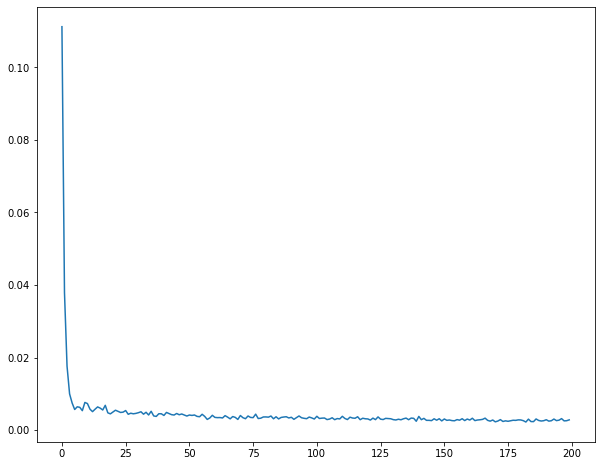

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [22]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
testing_data['Predicted_Price'] = pred_price

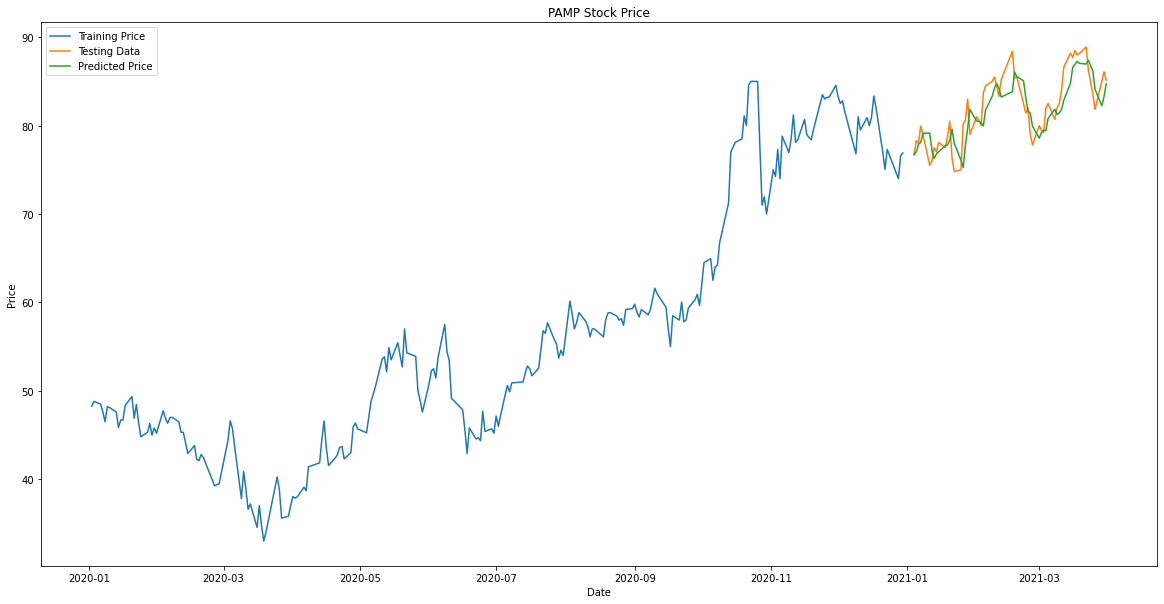

In [23]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

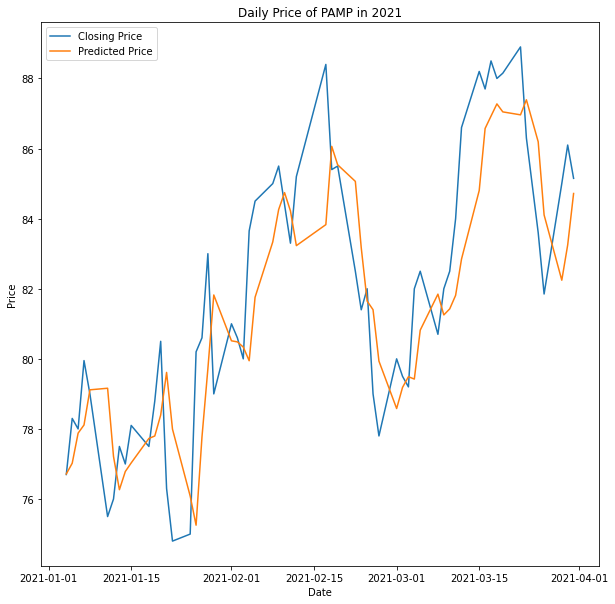

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price of PAMP in 2021')
plt.legend()
plt.show()

In [36]:
boll_df = PAMP[['Date']]
boll_df['Price'] = training_data['Price']
boll_df['Price'][240:] = testing_data['Predicted_Price']

C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/570996053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['Price'] = training_data['Price']
C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/570996053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['Price'][240:] = testing_data['Predicted_Price']
C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [40]:
boll_df['SMA'] = sma(boll_df['Price'], 20)
boll_df['upper_bb'], boll_df['lower_bb'] = bollinger(boll_df['Price'], boll_df['SMA'], 20)
boll_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/4042872622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['SMA'] = sma(boll_df['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/4042872622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['upper_bb'], boll_df['lower_bb'] = bollinger(boll_df['Price'], boll_df['SMA'], 20)


,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,48.250000,NaN,NaN,NaN
1,2020-01-03,48.800000,NaN,NaN,NaN
2,2020-01-06,48.500000,NaN,NaN,NaN
3,2020-01-07,47.600000,NaN,NaN,NaN
4,2020-01-08,46.500000,NaN,NaN,NaN
...,...,...,...,...,...
295,2021-03-25,86.193428,83.059274,89.472542,76.646006
296,2021-03-26,84.105873,83.194484,89.574545,76.814423
297,2021-03-29,82.243782,83.309915,89.523038,77.096792
298,2021-03-30,83.249397,83.543279,89.345752,77.740805


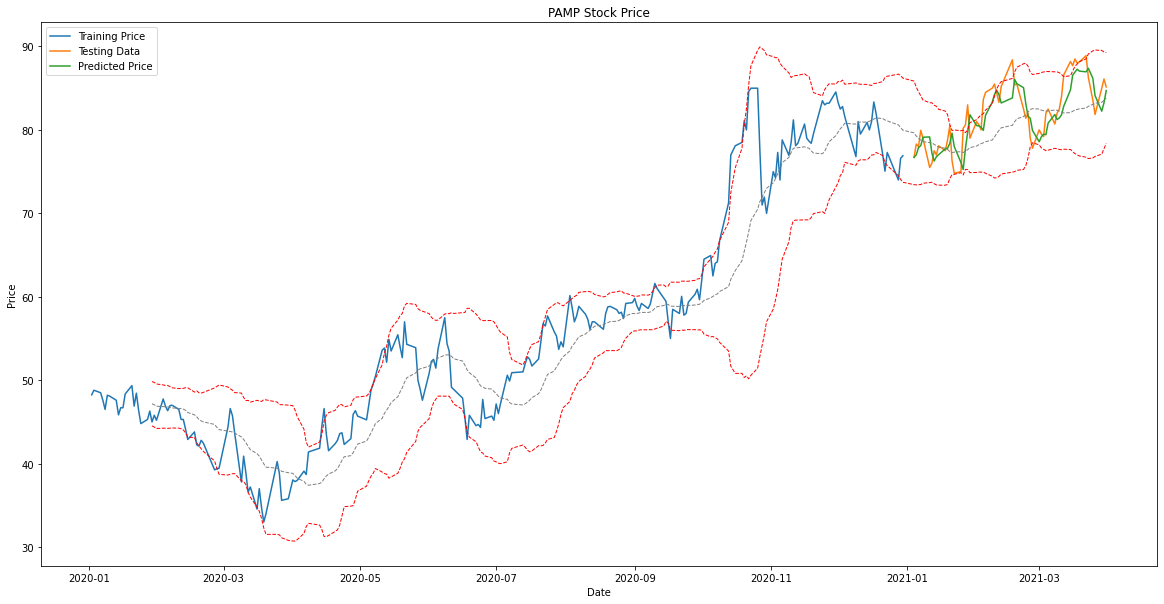

In [41]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.plot(boll_df['Date'], boll_df['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'], boll_df['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'], boll_df['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

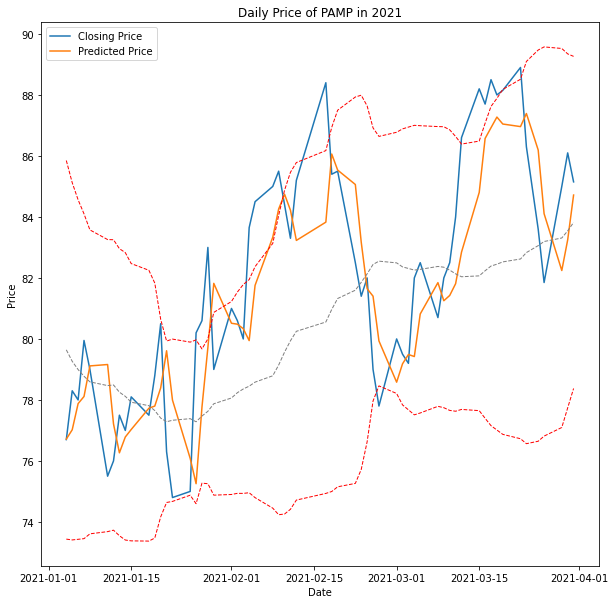

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.plot(boll_df['Date'][240:], boll_df['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'][240:], boll_df['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'][240:], boll_df['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price of PAMP in 2021')
plt.legend()
plt.show()

## Weekly

In [44]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 10)
X_test_w, y_test_w = get_weekly_test_data(PAMP, testing_data, scaler, 10)

In [45]:
inputs = tf.keras.Input(shape=(X_train_w.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(5, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 30,855
Trainable params: 30,855
Non-trainable

In [46]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train_w, y_train_w, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 3s 10ms/step - loss: 0.2183
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0324
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0312
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0341
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0325
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 9/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 10/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 12/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 13/200
2/2 [==============================] - 0s 9ms/step - 

2/2 [==============================] - 0s 8ms/step - loss: 0.0068
Epoch 105/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0081
Epoch 106/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 107/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 108/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 109/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0069
Epoch 110/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 111/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 112/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 113/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 114/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 115/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 116/200
2/2 [==============================] - 

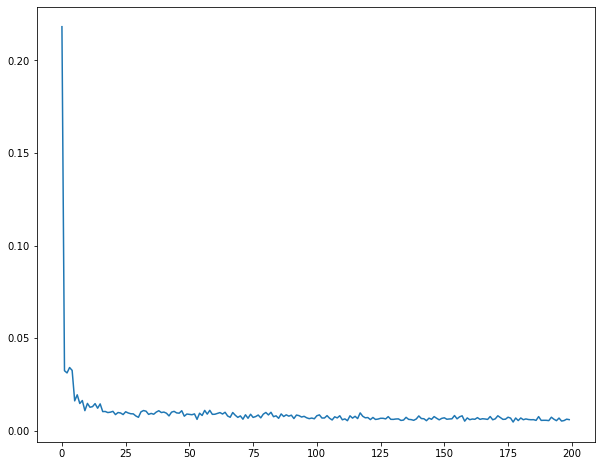

In [47]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [50]:
pred_price = model.predict(X_test_w)
pred_price = scaler.inverse_transform(pred_price)

train_pred_price = model.predict(X_train_w)
train_pred_price = scaler.inverse_transform(train_pred_price)

In [51]:
trainScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train_w[:,:]), train_pred_price))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test_w[:,:]), pred_price))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.85 RMSE
Test Score: 2.89 RMSE


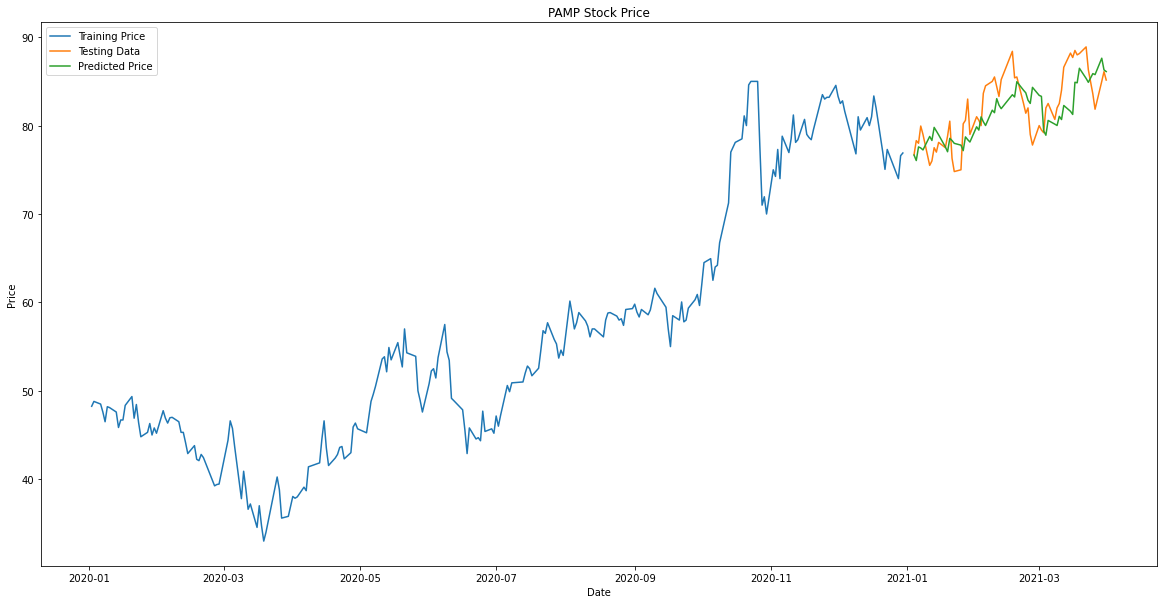

In [52]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], pred_price.flatten(), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

# Monthly

In [84]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 40)
X_test_m, y_test_m = get_monthly_test_data(PAMP, testing_data, scaler, 40)

In [99]:
inputs = tf.keras.Input(shape=(X_train_m.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(20, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 lstm_14 (LSTM)              (None, 40, 50)            10400     
                                                                 
 dropout_14 (Dropout)        (None, 40, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                1020      
                                                                 
Total params: 31,620
Trainable params: 31,620
Non-trainable

In [100]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train_m, y_train_m, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 3s 3s/step - loss: 0.2559
Epoch 2/200
1/1 [==============================] - 0s 29ms/step - loss: 0.1669
Epoch 3/200
1/1 [==============================] - 0s 27ms/step - loss: 0.1080
Epoch 4/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0457
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0534
Epoch 6/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0414
Epoch 7/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0487
Epoch 8/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0406
Epoch 9/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0373
Epoch 10/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0290
Epoch 11/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0267
Epoch 12/200
1/1 [==============================] - 0s 23ms/step - loss: 0.0254
Epoch 13/200
1/1 [==============================] - 0s 21ms/ste

1/1 [==============================] - 0s 22ms/step - loss: 0.0135
Epoch 104/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0122
Epoch 105/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0108
Epoch 106/200
1/1 [==============================] - 0s 25ms/step - loss: 0.0128
Epoch 107/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0164
Epoch 108/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0139
Epoch 109/200
1/1 [==============================] - 0s 23ms/step - loss: 0.0148
Epoch 110/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0145
Epoch 111/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0134
Epoch 112/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0124
Epoch 113/200
1/1 [==============================] - 0s 23ms/step - loss: 0.0179
Epoch 114/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0150
Epoch 115/200
1/1 [=======================

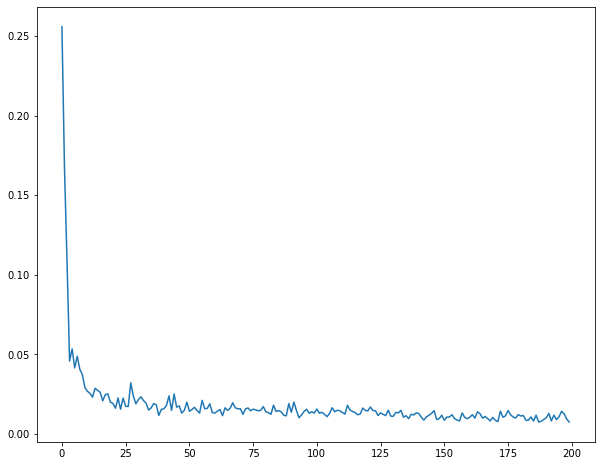

In [101]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [103]:
pred_price = model.predict(X_test_m)
pred_price = scaler.inverse_transform(pred_price)

train_pred_price = model.predict(X_train_m, )
train_pred_price = scaler.inverse_transform(train_pred_price)

In [104]:
trainScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train_m[:,:]), train_pred_price))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test_m[:,:]), pred_price))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.29 RMSE
Test Score: 4.47 RMSE


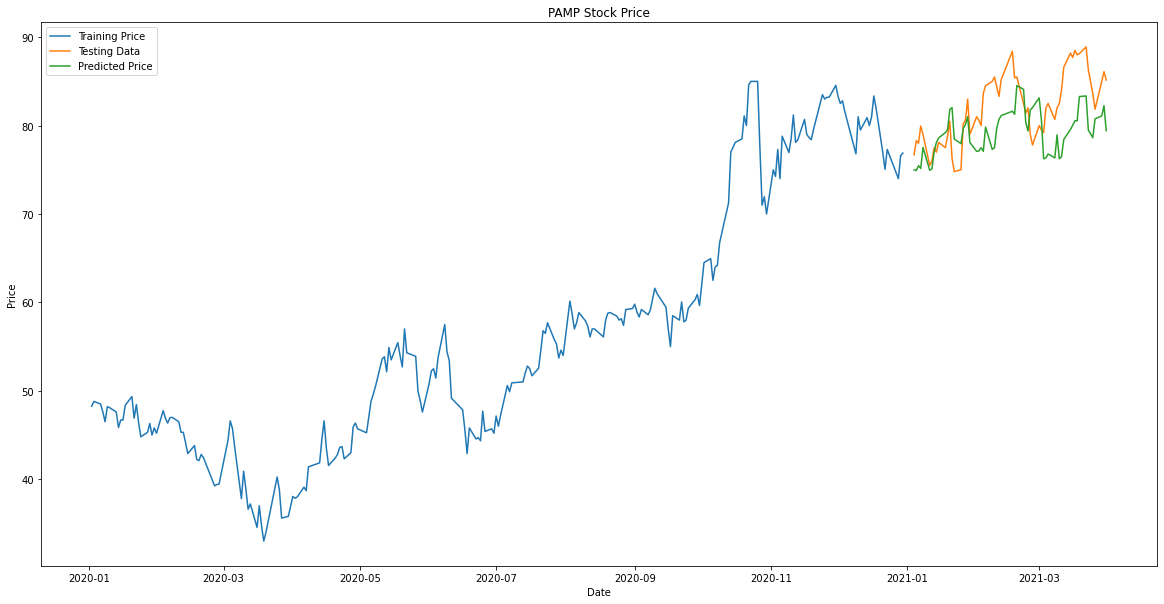

In [105]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], pred_price.flatten(), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

## PyTorch

In [190]:
X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(PAMP, testing_data, scaler, 14)

In [181]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [182]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)   
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [183]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

In [185]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.2974640130996704
Epoch  1 MSE:  0.13606925308704376
Epoch  2 MSE:  0.06813559681177139
Epoch  3 MSE:  0.05580253154039383
Epoch  4 MSE:  0.05233350023627281
Epoch  5 MSE:  0.05409850552678108
Epoch  6 MSE:  0.043082933872938156
Epoch  7 MSE:  0.03504124656319618
Epoch  8 MSE:  0.03726966306567192
Epoch  9 MSE:  0.0205746591091156
Epoch  10 MSE:  0.016831276938319206
Epoch  11 MSE:  0.009834537282586098
Epoch  12 MSE:  0.02042253315448761
Epoch  13 MSE:  0.010110612027347088
Epoch  14 MSE:  0.01572214998304844
Epoch  15 MSE:  0.007192372810095549
Epoch  16 MSE:  0.007238473743200302
Epoch  17 MSE:  0.008924517780542374
Epoch  18 MSE:  0.005131707061082125
Epoch  19 MSE:  0.0069062430411577225
Epoch  20 MSE:  0.008623777888715267
Epoch  21 MSE:  0.007083243690431118
Epoch  22 MSE:  0.005668499507009983
Epoch  23 MSE:  0.006628402043133974
Epoch  24 MSE:  0.006177945528179407
Epoch  25 MSE:  0.004123142920434475
Epoch  26 MSE:  0.00422030920162797
Epoch  27 MSE:  0.004918

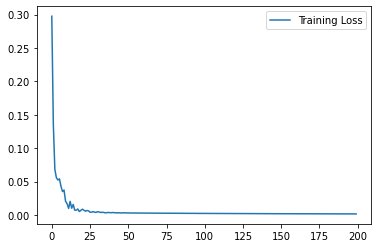

In [186]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [188]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.21 RMSE
Test Score: 2.19 RMSE


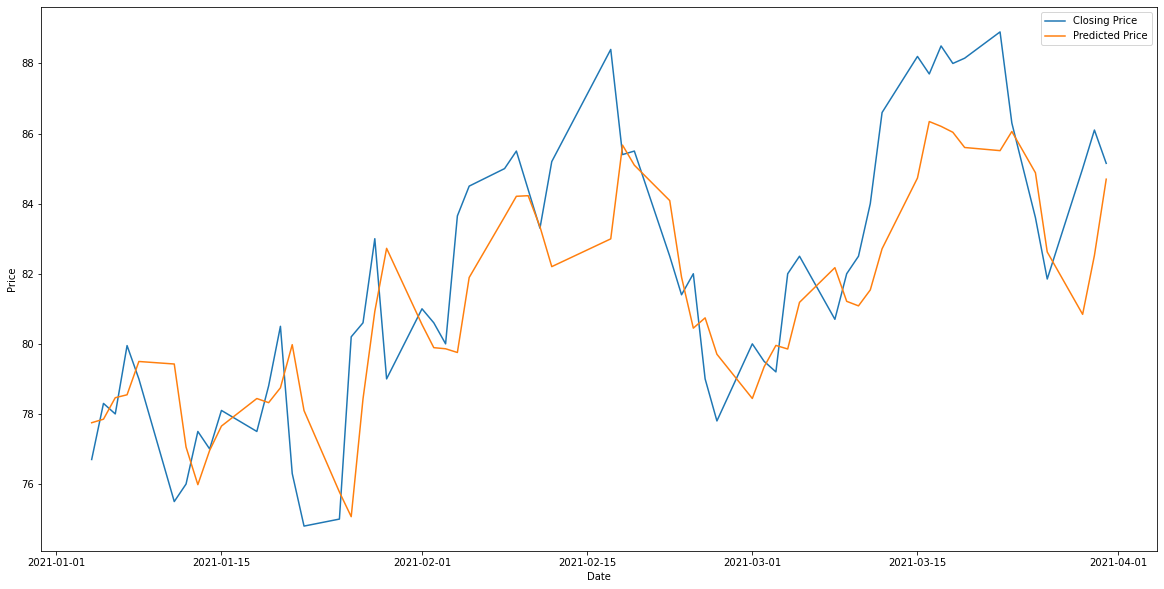

In [189]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Weekly

In [148]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [149]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 15)
X_test_w, y_test_w = get_weekly_test_data(PAMP, testing_data, scaler, 15)

In [150]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [151]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.18908724188804626
Epoch  1 MSE:  0.1139102578163147
Epoch  2 MSE:  0.06353530287742615
Epoch  3 MSE:  0.09845472872257233
Epoch  4 MSE:  0.05533657222986221
Epoch  5 MSE:  0.0700925886631012
Epoch  6 MSE:  0.07602877169847488
Epoch  7 MSE:  0.07229959964752197
Epoch  8 MSE:  0.06379563361406326
Epoch  9 MSE:  0.05475350096821785
Epoch  10 MSE:  0.049350060522556305
Epoch  11 MSE:  0.050433624535799026
Epoch  12 MSE:  0.05304783582687378
Epoch  13 MSE:  0.04779620096087456
Epoch  14 MSE:  0.038234174251556396
Epoch  15 MSE:  0.03180251643061638
Epoch  16 MSE:  0.027241401374340057
Epoch  17 MSE:  0.017374441027641296
Epoch  18 MSE:  0.01164572685956955
Epoch  19 MSE:  0.017633093520998955
Epoch  20 MSE:  0.013774638995528221
Epoch  21 MSE:  0.011640053242444992
Epoch  22 MSE:  0.00750711327418685
Epoch  23 MSE:  0.006489151157438755
Epoch  24 MSE:  0.008744755759835243
Epoch  25 MSE:  0.009541903622448444
Epoch  26 MSE:  0.009926235303282738
Epoch  27 MSE:  0.0103223733

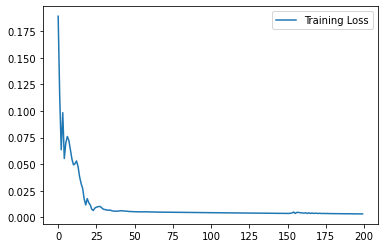

In [152]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [153]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 57.15 RMSE
Test Score: 77.44 RMSE


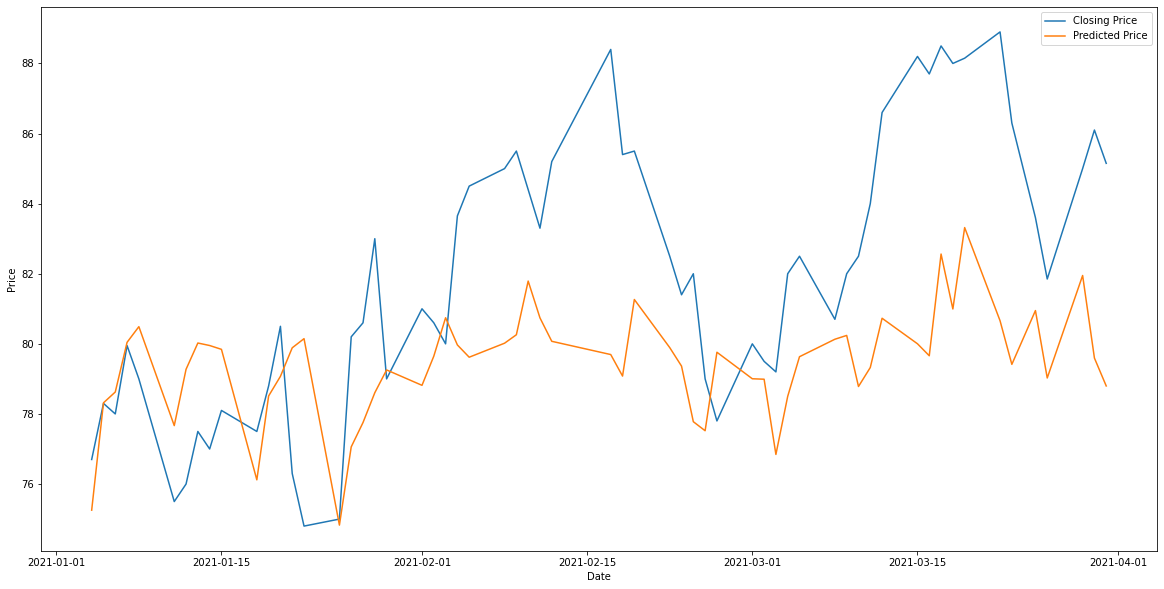

In [154]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Monthly

In [155]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [156]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 40)
X_test_m, y_test_m = get_monthly_test_data(PAMP, testing_data, scaler, 40)

In [157]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [158]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.2455158233642578
Epoch  1 MSE:  0.18190990388393402
Epoch  2 MSE:  0.0852084830403328
Epoch  3 MSE:  0.33770260214805603
Epoch  4 MSE:  0.10430054366588593
Epoch  5 MSE:  0.06521535664796829
Epoch  6 MSE:  0.08919147402048111
Epoch  7 MSE:  0.10143255442380905
Epoch  8 MSE:  0.1027941107749939
Epoch  9 MSE:  0.09816256165504456
Epoch  10 MSE:  0.09072773158550262
Epoch  11 MSE:  0.08251220732927322
Epoch  12 MSE:  0.07489493489265442
Epoch  13 MSE:  0.06901106983423233
Epoch  14 MSE:  0.06594622135162354
Epoch  15 MSE:  0.06602270901203156
Epoch  16 MSE:  0.06673509627580643
Epoch  17 MSE:  0.06578662246465683
Epoch  18 MSE:  0.0634693056344986
Epoch  19 MSE:  0.061110008507966995
Epoch  20 MSE:  0.059451404958963394
Epoch  21 MSE:  0.05838104709982872
Epoch  22 MSE:  0.0573611743748188
Epoch  23 MSE:  0.05571454018354416
Epoch  24 MSE:  0.05251462757587433
Epoch  25 MSE:  0.046256985515356064
Epoch  26 MSE:  0.038395773619413376
Epoch  27 MSE:  0.04277687892317772
Epo

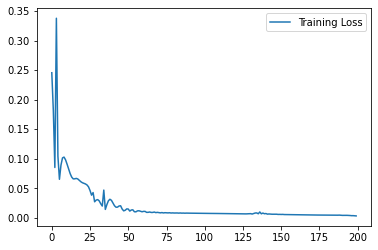

In [159]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [162]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 56.72 RMSE
Test Score: 80.83 RMSE


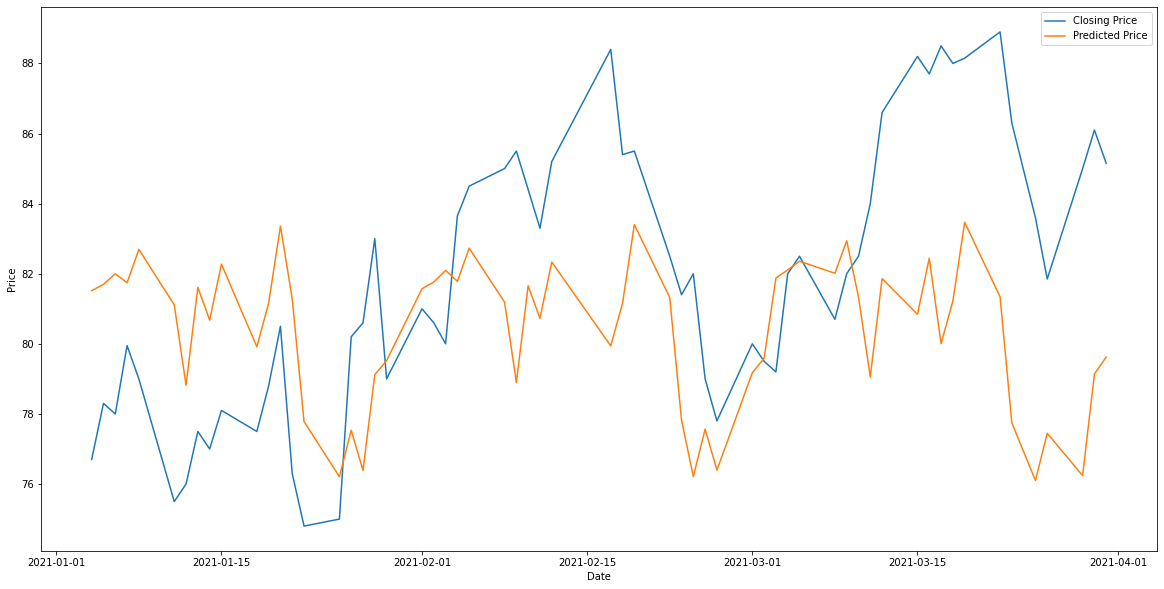

In [163]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()